In [11]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')
from sklearn.preprocessing import LabelEncoder
lb_make = LabelEncoder()

In [12]:
df = pd.read_csv('Gaming_Data_Cleaned_Draft1')
df = df.drop(columns='Unnamed: 0')

In [13]:
df.head()

,Game Title,Weekly Sales,All Time Sales,Weeks Out,Genre,Console,Publisher,Count
0,Pokemon Sun/Moon,312949,12347479,8,Role-Playing,3DS,Nintendo,709
1,Grand Theft Auto V,162293,13692364,112,Action,PS4,Take-Two Interactive,307
2,Super Mario Maker,147107,1979933,6,Platform,3DS,Nintendo,709
3,FIFA 17,138161,9719745,15,Sports,PS4,Electronic Arts,381
4,Call of Duty: Infinite Warfare,134299,6329596,10,Shooter,PS4,Activision,294


In [14]:
df = df.rename(columns={'Game Title':'Game_Title', 'Weekly Sales': 'Weekly_Sales', 'All Time Sales': 'All_Time_Sales',
                        'Weeks Out': 'Weeks_Out'})

In [15]:
pub_dummies = pd.get_dummies(df["Publisher"], prefix="pub")
gen_dummies = pd.get_dummies(df["Genre"], prefix="gen")
con_dummies = pd.get_dummies(df["Console"], prefix="con")

In [32]:
df = df.drop(["Publisher", "Genre", "Console"], axis=1)
df = pd.concat([df, pub_dummies, gen_dummies, con_dummies], axis=1)
df.head()

,Game_Title,Weekly_Sales,All_Time_Sales,Weeks_Out,Count,pub_505 Games,pub_Activision,pub_Atlus,pub_Bandai Namco Entertainment,pub_Bethesda Softworks,...,gen_Strategy,con_3DS,con_NS,con_PC,con_PS3,con_PS4,con_PSV,con_WiiU,con_X360,con_XOne
0,Pokemon Sun/Moon,312949,12347479,8,709,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,Grand Theft Auto V,162293,13692364,112,307,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,Super Mario Maker,147107,1979933,6,709,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,FIFA 17,138161,9719745,15,381,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,Call of Duty: Infinite Warfare,134299,6329596,10,294,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [33]:
#need to change column names for the dummy publishers because of spaces
cleaned_dummies = []
for names in list(df2.columns)[5:]:
    cleaned_dummies.append(names.replace(' ', '_'))
    
dict(zip(list(df2.columns[5:]), cleaned_dummies))

{'pub_505_Games': 'pub_505_Games',
 'pub_Activision': 'pub_Activision',
 'pub_Atlus': 'pub_Atlus',
 'pub_Bandai_Namco_Entertainment': 'pub_Bandai_Namco_Entertainment',
 'pub_Bethesda_Softworks': 'pub_Bethesda_Softworks',
 'pub_Capcom': 'pub_Capcom',
 'pub_Codemasters': 'pub_Codemasters',
 'pub_Deep_Silver': 'pub_Deep_Silver',
 'pub_Electronic_Arts': 'pub_Electronic_Arts',
 'pub_Focus_Home_Interactive': 'pub_Focus_Home_Interactive',
 'pub_Frontier_Developments': 'pub_Frontier_Developments',
 'pub_Gearbox_Software': 'pub_Gearbox_Software',
 'pub_Koch_Media': 'pub_Koch_Media',
 'pub_Konami_Digital_Entertainment': 'pub_Konami_Digital_Entertainment',
 'pub_Level_5': 'pub_Level_5',
 'pub_Maximum_Games': 'pub_Maximum_Games',
 'pub_Microsoft_Game_Studios': 'pub_Microsoft_Game_Studios',
 'pub_Microsoft_Studios': 'pub_Microsoft_Studios',
 'pub_Mojang': 'pub_Mojang',
 'pub_Namco_Bandai_Games': 'pub_Namco_Bandai_Games',
 'pub_Nintendo': 'pub_Nintendo',
 'pub_Rebellion_Developments': 'pub_Rebellion

In [34]:
df2 = df2.rename(columns={'pub_505 Games': 'pub_505_Games',
 'pub_Activision': 'pub_Activision',
 'pub_Atlus': 'pub_Atlus',
 'pub_Bandai Namco Entertainment': 'pub_Bandai_Namco_Entertainment',
 'pub_Bethesda Softworks': 'pub_Bethesda_Softworks',
 'pub_Capcom': 'pub_Capcom',
 'pub_Codemasters': 'pub_Codemasters',
 'pub_Deep Silver': 'pub_Deep_Silver',
 'pub_Electronic Arts': 'pub_Electronic_Arts',
 'pub_Focus Home Interactive': 'pub_Focus_Home_Interactive',
 'pub_Frontier Developments': 'pub_Frontier_Developments',
 'pub_Gearbox Software': 'pub_Gearbox_Software',
 'pub_Koch Media': 'pub_Koch_Media',
 'pub_Konami Digital Entertainment': 'pub_Konami_Digital_Entertainment',
 'pub_Level 5': 'pub_Level_5',
 'pub_Maximum Games': 'pub_Maximum_Games',
 'pub_Microsoft Game Studios': 'pub_Microsoft_Game_Studios',
 'pub_Microsoft Studios': 'pub_Microsoft_Studios',
 'pub_Mojang': 'pub_Mojang',
 'pub_Namco Bandai Games': 'pub_Namco_Bandai_Games',
 'pub_Nintendo': 'pub_Nintendo',
 'pub_Rebellion Developments': 'pub_Rebellion_Developments',
 'pub_Sega': 'pub_Sega',
 'pub_Sony Computer Entertainment': 'pub_Sony_Computer_Entertainment',
 'pub_Sony Interactive Entertainment': 'pub_Sony_Interactive_Entertainment',
 'pub_Square Enix': 'pub_Square_Enix',
 'pub_Studio Wildcard': 'pub_Studio_Wildcard',
 'pub_Take-Two Interactive': 'pub_TakeTwo_Interactive',
 'pub_Tecmo Koei': 'pub_Tecmo_Koei',
 'pub_Ubisoft': 'pub_Ubisoft',
 'pub_Warner Bros. Interactive Entertainment': 'pub_Warner_Bros_Interactive_Entertainment',
 'gen_Action': 'gen_Action',
 'gen_Action-Adventure': 'gen_ActionAdventure',
 'gen_Adventure': 'gen_Adventure',
 'gen_Fighting': 'gen_Fighting',
 'gen_MMO': 'gen_MMO',
 'gen_Misc': 'gen_Misc',
 'gen_Music': 'gen_Music',
 'gen_Party': 'gen_Party',
 'gen_Platform': 'gen_Platform',
 'gen_Puzzle': 'gen_Puzzle',
 'gen_Racing': 'gen_Racing',
 'gen_Role-Playing': 'gen_RolePlaying',
 'gen_Sandbox': 'gen_Sandbox',
 'gen_Shooter': 'gen_Shooter',
 'gen_Simulation': 'gen_Simulation',
 'gen_Sports': 'gen_Sports',
 'gen_Strategy': 'gen_Strategy',
 'con_3DS': 'con_3DS',
 'con_NS': 'con_NS',
 'con_PC': 'con_PC',
 'con_PS3': 'con_PS3',
 'con_PS4': 'con_PS4',
 'con_PSV': 'con_PSV',
 'con_WiiU': 'con_WiiU',
 'con_X360': 'con_X360',
 'con_XOne': 'con_XOne'})

In [35]:
dummy = ''
for names in cleaned_dummies:
    dummy += names
    dummy += '+'
dummy

'pub_505_Games+pub_Activision+pub_Atlus+pub_Bandai_Namco_Entertainment+pub_Bethesda_Softworks+pub_Capcom+pub_Codemasters+pub_Deep_Silver+pub_Electronic_Arts+pub_Focus_Home_Interactive+pub_Frontier_Developments+pub_Gearbox_Software+pub_Koch_Media+pub_Konami_Digital_Entertainment+pub_Level_5+pub_Maximum_Games+pub_Microsoft_Game_Studios+pub_Microsoft_Studios+pub_Mojang+pub_Namco_Bandai_Games+pub_Nintendo+pub_Rebellion_Developments+pub_Sega+pub_Sony_Computer_Entertainment+pub_Sony_Interactive_Entertainment+pub_Square_Enix+pub_Studio_Wildcard+pub_TakeTwo_Interactive+pub_Tecmo_Koei+pub_Ubisoft+pub_Warner_Bros_Interactive_Entertainment+gen_Action+gen_ActionAdventure+gen_Adventure+gen_Fighting+gen_MMO+gen_Misc+gen_Music+gen_Party+gen_Platform+gen_Puzzle+gen_Racing+gen_RolePlaying+gen_Sandbox+gen_Shooter+gen_Simulation+gen_Sports+gen_Strategy+con_3DS+con_NS+con_PC+con_PS3+con_PS4+con_PSV+con_WiiU+con_X360+con_XOne+'

In [36]:
form = ('All_Time_Sales~Weeks_Out+Weekly_Sales+pub_Activision+pub_Atlus+pub_Bandai_Namco_Entertainment' +
'+pub_Bethesda_Softworks+pub_Capcom+pub_Codemasters+pub_Deep_Silver+' +
'pub_Electronic_Arts+pub_Focus_Home_Interactive+pub_Frontier_Developments+pub_Gearbox_Software+' +
'pub_Koch_Media+pub_Konami_Digital_Entertainment+pub_Level_5+pub_Maximum_Games+pub_Microsoft_Game_Studios+' +
'pub_Microsoft_Studios+pub_Mojang+pub_Namco_Bandai_Games+pub_Nintendo+pub_Rebellion_Developments+pub_Sega+' +
'pub_Sony_Computer_Entertainment+pub_Sony_Interactive_Entertainment+pub_Square_Enix+pub_Studio_Wildcard+' +
'pub_TakeTwo_Interactive+pub_Tecmo_Koei+pub_Ubisoft+pub_Warner_Bros_Interactive_Entertainment++gen_Action+' +
'gen_ActionAdventure+gen_Adventure+gen_Fighting+gen_MMO+gen_Misc+gen_Music+gen_Party+gen_Platform+gen_Puzzle+' +
'gen_Racing+gen_RolePlaying+gen_Sandbox+gen_Shooter+gen_Simulation+gen_Sports+gen_Strategy+con_NS+con_PC+' +
'con_PS3+con_PS4+con_PSV+con_WiiU+con_X360+con_XOne')




In [37]:
lr_model = ols(formula=form, data=df2).fit()

In [38]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         All_Time_Sales   R-squared:                       0.625
Model:                            OLS   Adj. R-squared:                  0.619
Method:                 Least Squares   F-statistic:                     90.07
Date:                Thu, 18 Apr 2019   Prob (F-statistic):               0.00
Time:                        14:57:55   Log-Likelihood:                -48822.
No. Observations:                3022   AIC:                         9.776e+04
Df Residuals:                    2966   BIC:                         9.809e+04
Df Model:                          55                                         
Covariance Type:            nonrobust                                         
=============================================================================================================
                                                coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
Intercept                                  1.738e+04   8.76e+05      0.020      0.984    -1.7e+06    1.74e+06
Weeks_Out                                  5.256e+04   1372.427     38.297      0.000    4.99e+04    5.53e+04
Weekly_Sales                                  0.7131      0.183      3.895      0.000       0.354       1.072
pub_Activision                             2.651e+06   9.34e+05      2.839      0.005     8.2e+05    4.48e+06
pub_Atlus                                  -1.39e+06   1.36e+06     -1.019      0.308   -4.07e+06    1.29e+06
pub_Bandai_Namco_Entertainment            -4.566e+05   1.13e+06     -0.405      0.685   -2.66e+06    1.75e+06
pub_Bethesda_Softworks                    -7.936e+05    9.7e+05     -0.818      0.413    -2.7e+06    1.11e+06
pub_Capcom                                -5.775e+05   9.58e+05     -0.603      0.547   -2.46e+06     1.3e+06
pub_Codemasters                           -7.194e+05   1.19e+06     -0.606      0.545   -3.05e+06    1.61e+06
pub_Deep_Silver                           -2.222e+06    1.1e+06     -2.015      0.044   -4.38e+06   -5.97e+04
pub_Electronic_Arts                        2.834e+06   9.27e+05      3.056      0.002    1.02e+06    4.65e+06
pub_Focus_Home_Interactive                -6.023e+05   1.25e+06     -0.480      0.631   -3.06e+06    1.86e+06
pub_Frontier_Developments                  1.552e+06   1.49e+06      1.041      0.298   -1.37e+06    4.47e+06
pub_Gearbox_Software                      -2.718e+06   1.19e+06     -2.276      0.023   -5.06e+06   -3.77e+05
pub_Koch_Media                            -7.543e+05   1.29e+06     -0.587      0.558   -3.28e+06    1.77e+06
pub_Konami_Digital_Entertainment          -1.055e+05   1.09e+06     -0.097      0.923   -2.24e+06    2.03e+06
pub_Level_5                                   -1e+06   1.18e+06     -0.847      0.397   -3.31e+06    1.31e+06
pub_Maximum_Games                         -1.528e+06   1.28e+06     -1.193      0.233   -4.04e+06    9.83e+05
pub_Microsoft_Game_Studios                 1.755e+06   1.12e+06      1.572      0.116   -4.34e+05    3.94e+06
pub_Microsoft_Studios                      1.183e+06   9.62e+05      1.229      0.219   -7.04e+05    3.07e+06
pub_Mojang                                 3.873e+05   4.86e+05      0.797      0.426   -5.66e+05    1.34e+06
pub_Namco_Bandai_Games                    -8.312e+05   9.64e+05     -0.862      0.389   -2.72e+06    1.06e+06
pub_Nintendo                               3.208e+06   9.46e+05      3.391      0.001    1.35e+06    5.06e+06
pub_Rebellion_Developments                -5.736e+05   1.39e+06     -0.413      0.679   -3.29e+06    2.15e+06
pub_Sega                                  -1.527e+06   1.02e+06     -1.502      0.133   -3.52e+06    4.66e+05
pub

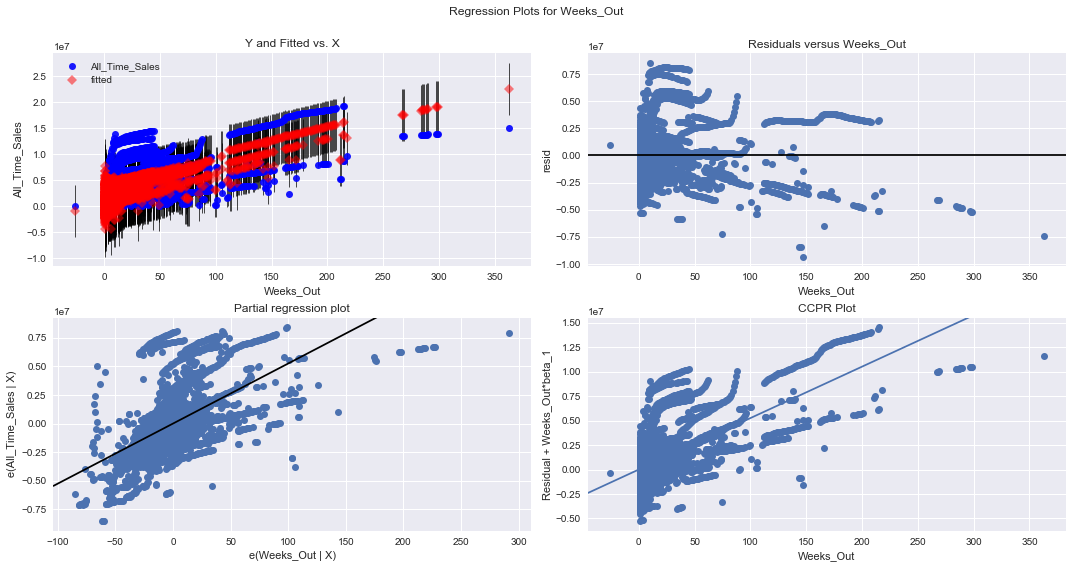

In [39]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(lr_model, "Weeks_Out", fig=fig)
plt.show()

/Users/hiowatah/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


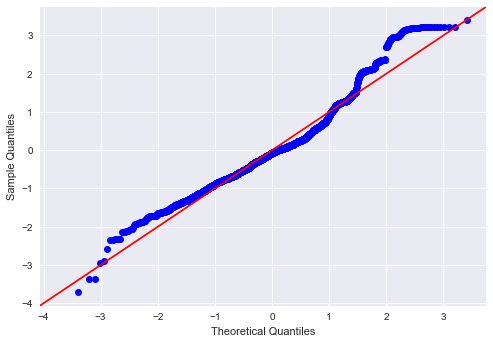

In [40]:
import scipy.stats as stats
residuals = lr_model.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
fig.show()